In [1]:
%config InlineBackend.figure_format = 'svg'

(appendix_01)=

# Appendix 0: Ipython Widgets

You can create widgets such as sliders or check boxes in Jupyter notebooks to make it easier to rapidly modify input values in your code. This can be useful for rapid experimentation with different parameters in your code or as part of a demo. For this, we will use [Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/index.html). In the following examples, we will simulate an NMR free induction decay (fid) signal and NMR splitting pattern to see how changing various parameters affects the end result. This section assumes knowledge of chapters 0-4, but you probably can (mostly) follow along if you are through chapter 1.

```{note}
While the widgets in this appendix are movable, the graphs do *not* change because this is a static book with no kernel running in the back. If you download this notebook and run it yourself, the values and graphs will automatically update as you interact with the widgets.
```

This notebook requires that you have [ipywidgets installed either using pip or conda](https://ipywidgets.readthedocs.io/en/latest/user_install.html). There is a good chance you already have it installed, though. The last example also assumes you have nmrsim installed from [section 11.2](11.2). This appendix assumes the following imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from nmrsim import Multiplet
from nmrsim.plt import mplplot

from ipywidgets import interact, interact_manual, FloatSlider, FloatRangeSlider, RadioButtons

## Basic Widgets

To create a widget that affects your code, you must first package the code in a single Python function. Below we will simulate an NMR free induction decay (fid) by the following equation where $t$ is time in seconds, $\nu$ is frequency in Hz, and T$_2$ is the relaxation constant.

$$ signal(t) = cos(2 \pi \nu t) e^{-t/T_2} $$

We will see how the frequency ($\nu$) and T$_2$ affect the appearance of the fid. To do this, we will write a function, `plot_fid(nu, T2)`, that accepts these two parameters as arguments and generates a plot of signal versus time.

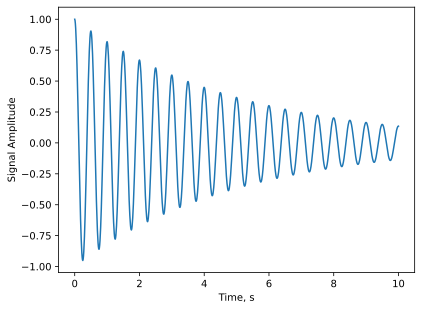

In [3]:
def plot_fid(nu, T2):
    t = np.linspace(0,10,1000)
    wave = np.cos(2*np.pi*nu*t)
    decay_func = np.exp(-t/T2)
    
    plt.plot(t, wave*decay_func)
    plt.xlabel('Time, s')
    plt.ylabel('Signal Amplitude')

plot_fid(2, 5)

To make this function interactive, we will use the `interact()` function from ipywidgets which takes our function above as a required, positional argument. We also need to provide initial values for our two parameters as keyword arguments as demonstrated below. When we run our code, two sliders appear above our graph. As noted above, the sliders do not affect the plot *in this static book* but would automatically change the graph if you run the code in your own Jupyter notebook. 

````{margin}
```{note}
If you wrote your function with keyword arguments instead of positional arguments, the `interact()` does *not* require initial values.
```
````

In [4]:
interact(plot_fid, nu=2, T2=5);

interactive(children=(IntSlider(value=2, description='nu', max=6, min=-2), IntSlider(value=5, description='T2'…

The `interact()` function makes a guess at the ranges of values you might need for your parameters, but you can also explicitly define these by providing a tuple with minimum, maximum, and step size values in this order (`(min, max, step)`). 

In [5]:
interact(plot_fid, nu=(1,10,1), T2=(1,5, 0.5));

interactive(children=(IntSlider(value=5, description='nu', max=10, min=1), FloatSlider(value=3.0, description=…

At this point, you may be wondering why you get slides versus any other type of widget. The `interact()` function automatically generates sliders for function arguments with numerical values. If the argument in `interact()` contains a list, a dropdown menu appears, a bool generates a check box, and a text argument produces a text box.

In [6]:
interact(plot_fid, nu=[1,2,3,4,5,6], T2=2);

interactive(children=(Dropdown(description='nu', options=(1, 2, 3, 4, 5, 6), value=1), IntSlider(value=2, desc…

## Customized Widgets

You can customize your widgets with more widget types listed in the [Ipywidgets documentation page](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html). For example, if we want our frequency to be controlled by buttons, we can create a button widget with ipywidget's `RadioButtons()` function and assign that to the frequency variable in the `interact()` function. Each customized widget can have different arguments, so it is a good idea to view the documentation on the [Ipywidgets documentation page](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).

In [7]:
button_widget = RadioButtons(options=[1,2,3,4,5,6])
interact(plot_fid, nu=button_widget, T2=(1,5,0.5));

interactive(children=(RadioButtons(description='nu', options=(1, 2, 3, 4, 5, 6), value=1), FloatSlider(value=3…

As a second example of a custom widget, we will create a slider with upper and lower limits using either `FloatRangeSlider()` or `IntRangeSlider()`. As you might guess, one is for float values and the other is for integers. It is important to note that these two widgets return two values in a tuple, so your function must be written to accept a two-valued tuple as an argument.

In [8]:
def plot_fid_limits(nu, T2, limits):
    t = np.linspace(0,10,1000)
    wave = np.cos(2*np.pi*nu*t)
    decay_func = np.exp(-t/T2)
    
    plt.plot(t, wave*decay_func)
    plt.xlabel('Time, s')
    plt.ylabel('Signal Amplitude')
    plt.xlim(limits)

frs = FloatRangeSlider(min=0, max=10, step=0.5)
interact(plot_fid_limits, nu=(1,10,1), T2=(1,5, 0.5), limits=frs);

interactive(children=(IntSlider(value=5, description='nu', max=10, min=1), FloatSlider(value=3.0, description=…

## Slow Functions

If your function is slow to run, you may not want it to execute every time the slider moves. There are two solutions to this. The first is to use the `interact_manual()` function which is a cousin of the `interact()` function except that your function only runs when you click the Run Interact button.

In [9]:
interact_manual(plot_fid, nu=(1,10,1), T2=(1,5,0.5));

interactive(children=(IntSlider(value=5, description='nu', max=10, min=1), FloatSlider(value=3.0, description=…

The second option is to create a custom slider widget and set the parameter `continuous_update=False`. This will result in your function only running once you let go of the slider with your mouse. A basic float slider can be created with the `FloatSlider()` function like is done below.

In [10]:
fs = FloatSlider(min=1, max=10, step=1, continuous_update=False)
interact(plot_fid, nu=fs, T2=(1,5, 0.5));

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='nu', max=10.0, min=1.0, ste…

## Simulating NMR Splitting Patterns

As an additional example, we will simulate NMR splitting patterns below using the nmrsim library introduced in [section 11.2](11.2). For this, we will use the `Multiplet()` function  which takes the resonance frequency in Hz (`v`) as the first positional argument followed by the intensity (`I`) of the resonance signal. The parameters that we are most interested in here is the number of each type of neighbors and the coupling constants with these neighbors which are provided as coupling constants(`J`) and number of nuclei (`n_nuc`) pairs in a list of tuples.

~~~python
Multiple(v, I, [(J1, n_nuc1),(J2, n_nuc1)])
~~~

The function below assumes our signal is being split by two types of neighboring nuclei - `n_nuc1` of the first type of neighbors with a `J1` coupling constant and `n_nuc2` of the second type of neighbors with a `J2` coupling constant. This resonance will be visualized using the `mplplot()` function from nmrsim.

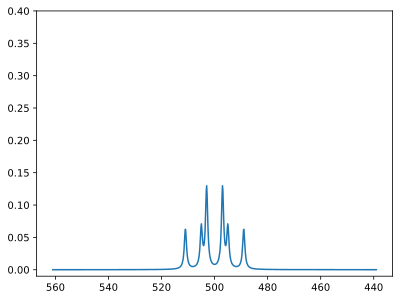

In [11]:
def plot_nmr(J1=8.0, J2=6.0, n1=2, n2=1, y_max=0.4):
    res = Multiplet(500, 1, [(J1, n1), (J2, n2)])
    mplplot(res.peaklist(), y_max=y_max)

plot_nmr();

We can again feed our function into `interact()` which produces sliders because our parameters are all numbers.

In [12]:
interact(plot_nmr, J1=8.0, J2=12.0);

interactive(children=(FloatSlider(value=8.0, description='J1', max=24.0, min=-8.0), FloatSlider(value=12.0, de…

We can change the widget type to pull-down menus like below.

In [13]:
interact(plot_nmr, n1=[1,2,3], n2=[1,2,3], J1=(0, 16), J2=(0, 16));

interactive(children=(IntSlider(value=8, description='J1', max=16), IntSlider(value=6, description='J2', max=1…